In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fake_transactional_data_24.csv')
df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025
...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025


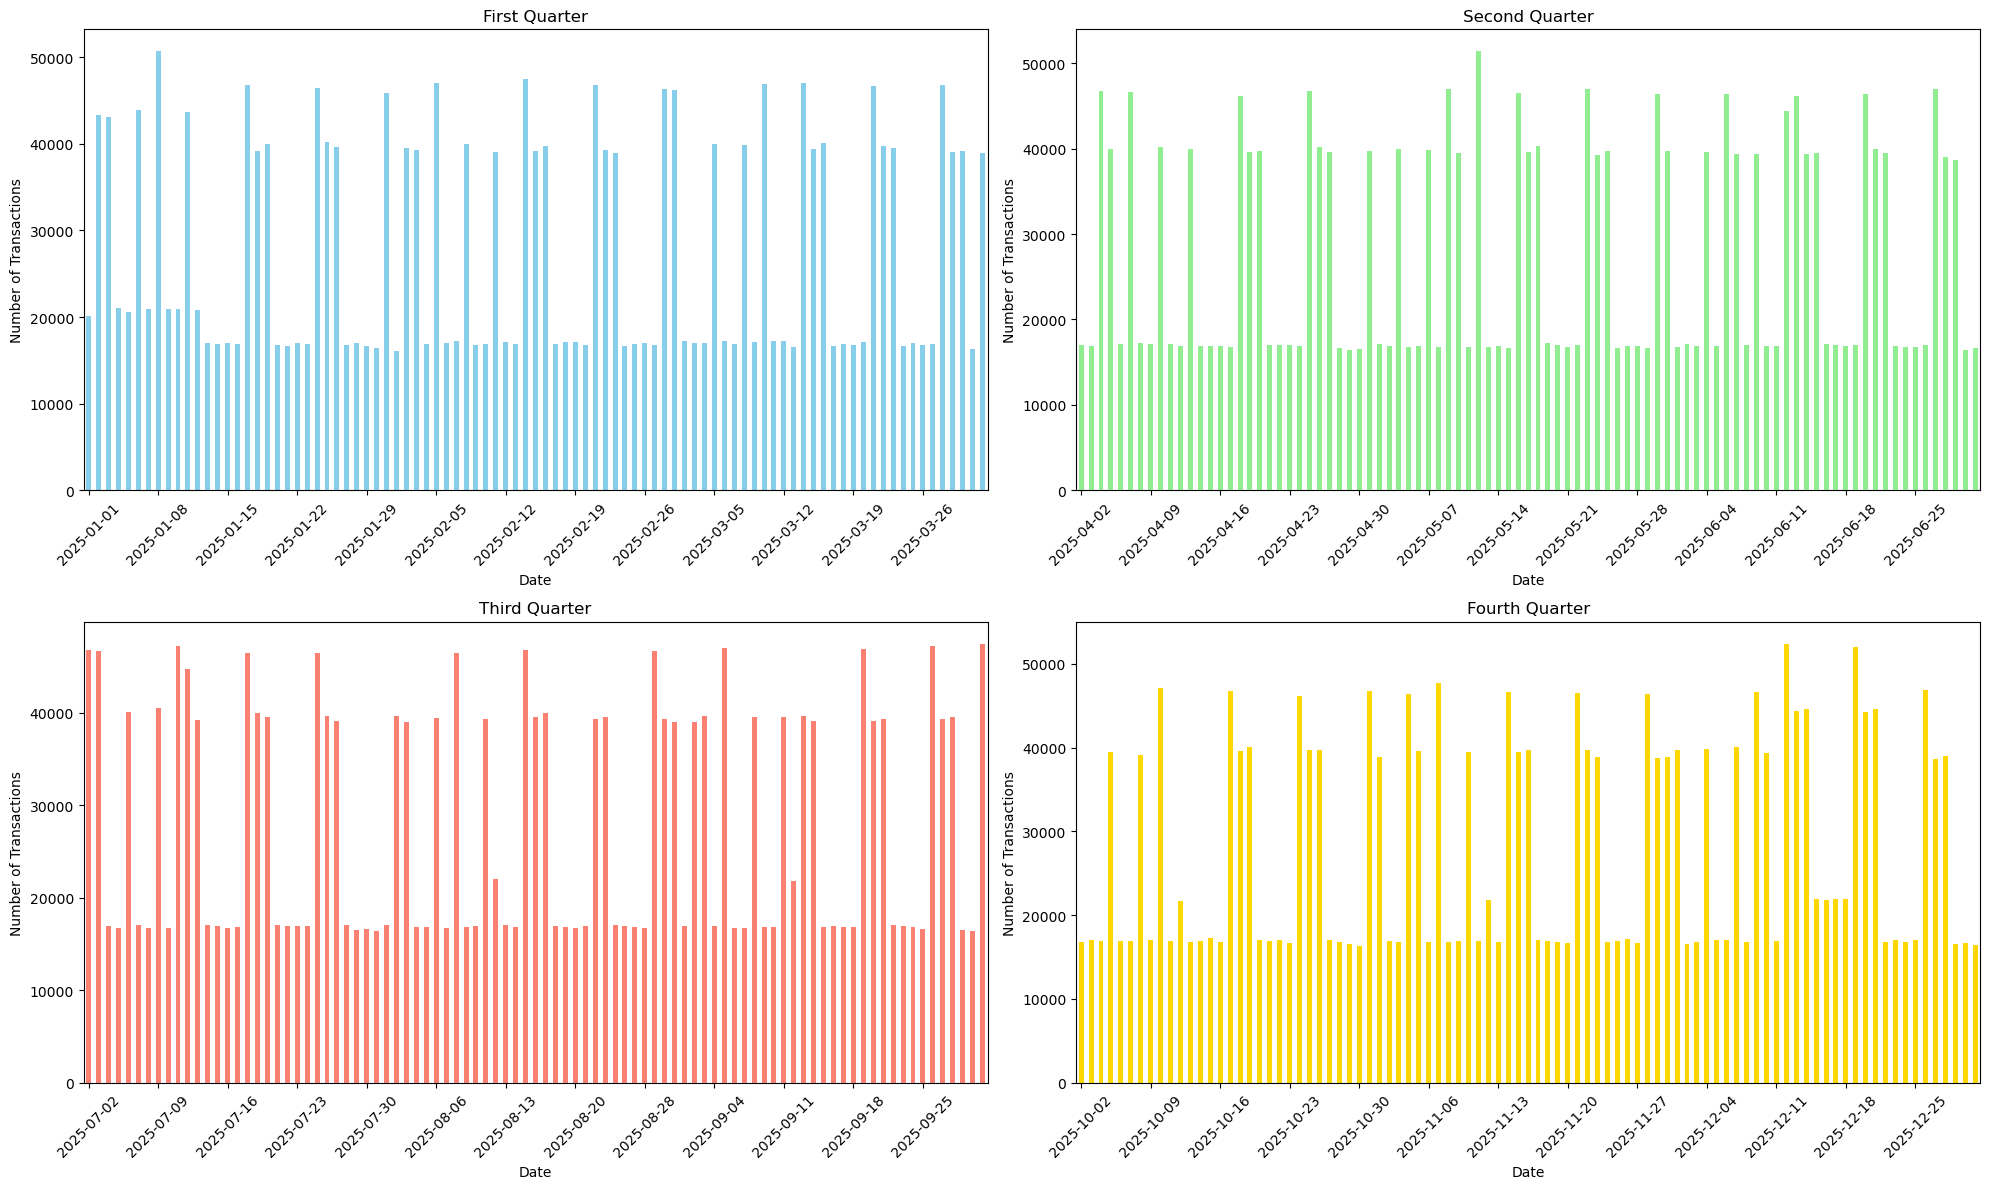

In [4]:
df['not_happened_yet_date'] = pd.to_datetime(df['not_happened_yet_date'], format='mixed')
data_sorted = df.sort_values('not_happened_yet_date')
transactions_per_date = data_sorted['not_happened_yet_date'].value_counts().sort_index()

# Adjusting the division of data into quarters to ensure each has data

# Calculate the index to split the data ensuring all quarters have data
quarters_indices = [i*365//4 for i in range(4)] + [365]

# Re-plotting with adjusted quarters
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

quarters_data = [transactions_per_date[quarters_indices[i]:quarters_indices[i+1]] for i in range(4)]

titles = ['First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter']
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

for i, ax in enumerate(axes.flatten()):
    quarters_data[i].plot(kind='bar', color=colors[i], ax=ax, title=titles[i])
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Transactions')
    ax.tick_params(axis='x', rotation=45)

    # Setting x-ticks to show every 7th day
    x_ticks_positions = range(0, len(quarters_data[i]), 7)
    x_ticks_labels = [date.strftime('%Y-%m-%d') for idx, date in enumerate(quarters_data[i].index) if idx % 7 == 0]

    ax.set_xticks(x_ticks_positions)
    ax.set_xticklabels(x_ticks_labels, rotation=45)

plt.tight_layout()
plt.show()


In [5]:
def rename(text):
    # Check if 'coffee' is in the cell, case-insensitive
    if 'coffee' in text.lower() or 'cafe' in text.lower():
        return 'COFFEE'
    if 'bar' in text.lower() or 'pub' in text.lower():
        return 'PUB'
    if 'sandwich' in text.lower():
        return 'SANDWICH'
    if 'kebab' in text.lower():
        return 'KEBAB'
    if 'book' in text.lower():
        return 'BOOK'
    else:
        return text


string_df = df[df['to_randomly_generated_account'].str.isnumeric() == False]
string_df['to_randomly_generated_account'] = string_df['to_randomly_generated_account'].apply(rename)

C:\Users\86133\AppData\Local\Temp\ipykernel_26588\3270509251.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  string_df['to_randomly_generated_account'] = string_df['to_randomly_generated_account'].apply(rename)


In [7]:
string_df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,2025-01-01
3,18555.0,4.10,COFFEE,2025-01-01
5,18555.0,4.45,COFFEE,2025-01-01
6,18555.0,1.45,COFFEE,2025-01-01
7,18555.0,5.00,COFFEE,2025-01-01
...,...,...,...,...
10148274,81404.0,1.80,COFFEE,2025-12-31
10148275,32185.0,2.65,COFFEE,2025-12-31
10148276,32185.0,2.45,COFFEE,2025-12-31
10148277,57569.0,14.00,PUB,2025-12-31


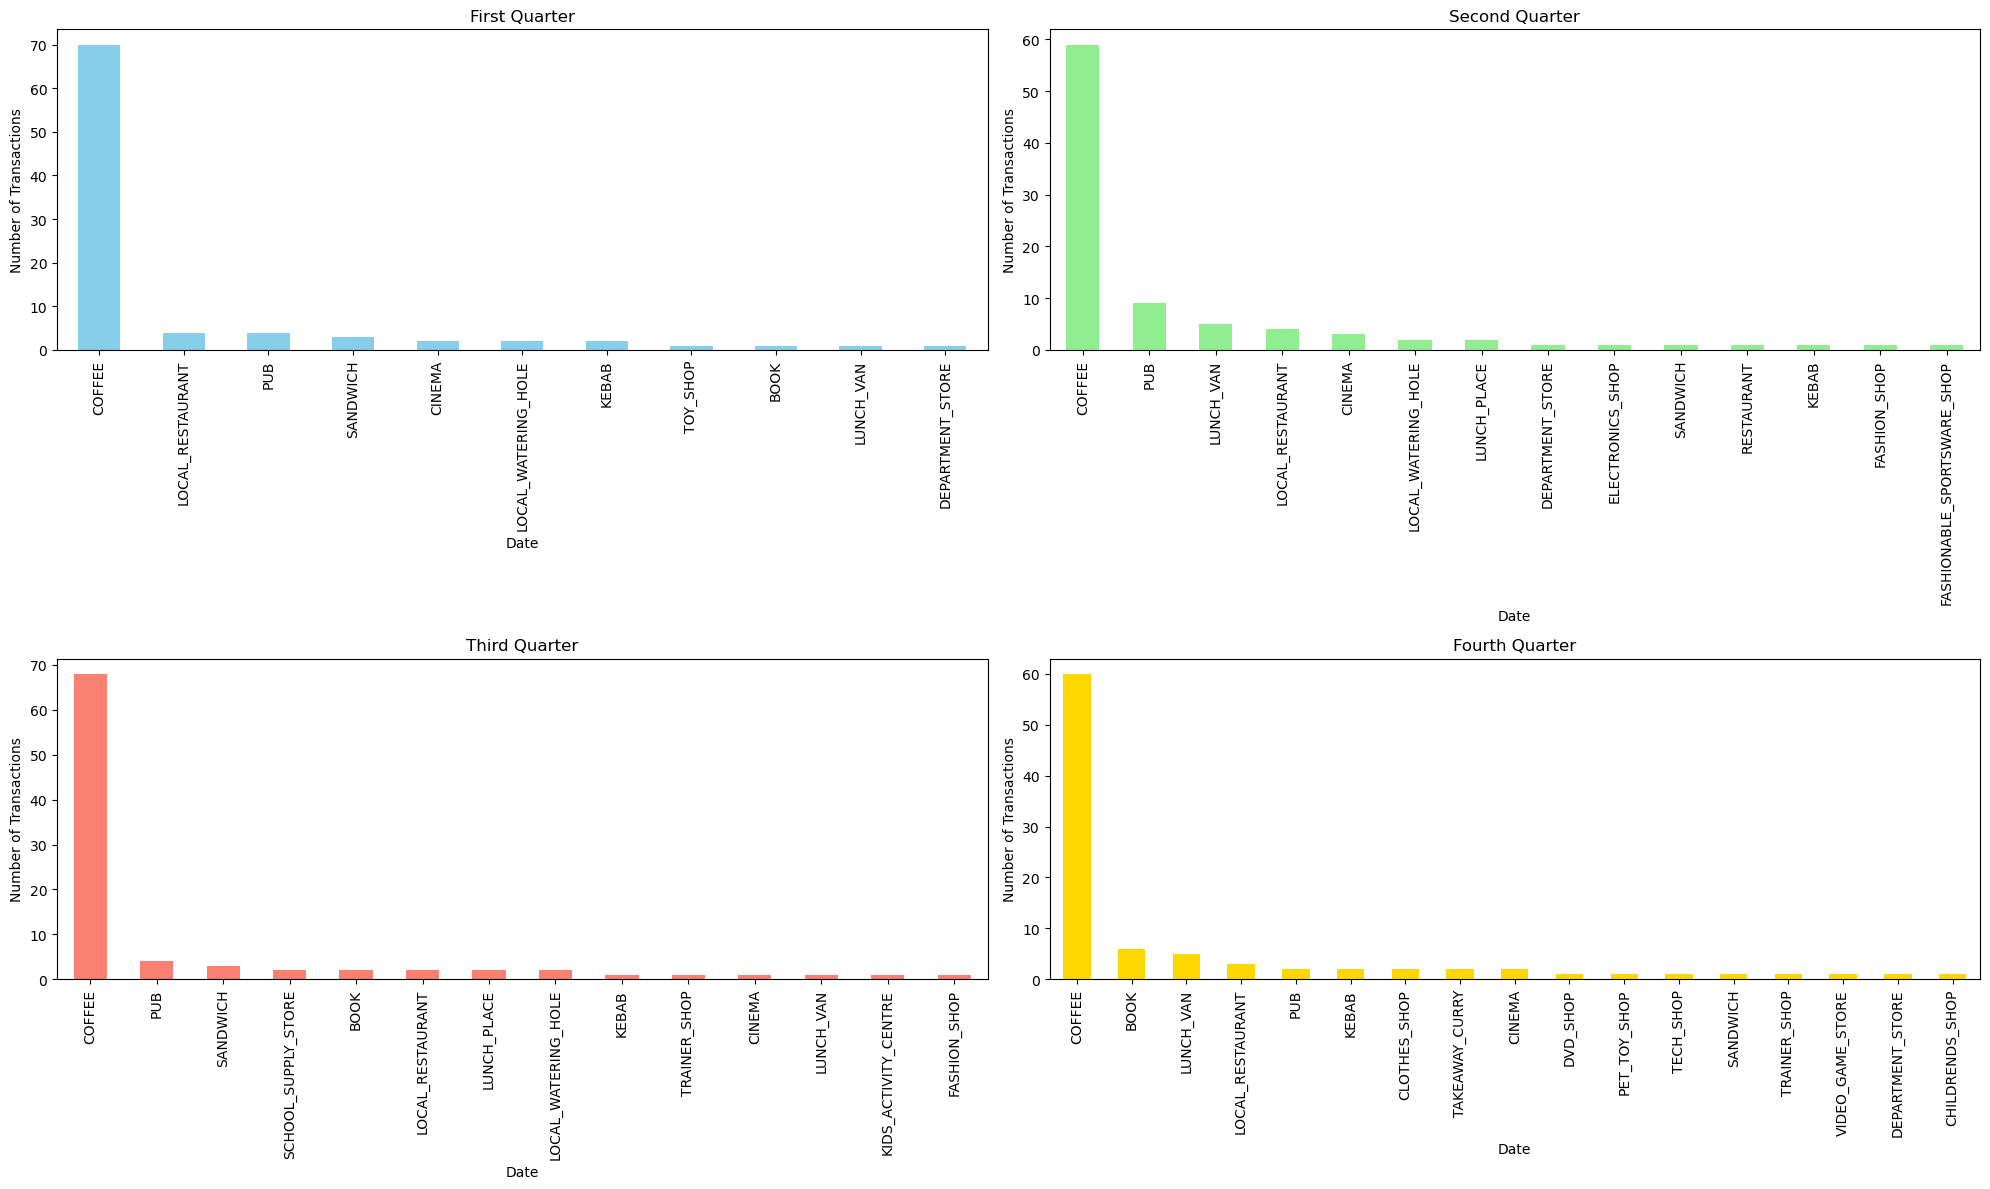

In [6]:
quarters_indices = [i*365//4 for i in range(4)] + [365]

# Re-plotting with adjusted quarters
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

quarters_data = [string_df[quarters_indices[i]:quarters_indices[i+1]] for i in range(4)]

titles = ['First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter']
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

for i, ax in enumerate(axes.flatten()):
    data = quarters_data[i]['to_randomly_generated_account'].value_counts()
    data.plot(kind='bar', color=colors[i], ax=ax, title=titles[i])
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Transactions')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
